<a href="https://colab.research.google.com/github/Mcuong1923/Databt/blob/main/09_Time_Series/Apple_Stock/Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np


### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/appl_1980_2014.csv)

In [2]:
url = 'https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/appl_1980_2014.csv'


### Step 3. Assign it to a variable apple

In [4]:
apple = pd.read_csv(url)
print(apple.head())


         Date   Open   High    Low  Close    Volume  Adj Close
0  2014-07-08  96.27  96.80  93.92  95.35  65130000      95.35
1  2014-07-07  94.14  95.99  94.10  95.97  56305400      95.97
2  2014-07-03  93.67  94.10  93.20  94.03  22891800      94.03
3  2014-07-02  93.87  94.06  93.09  93.48  28420900      93.48
4  2014-07-01  93.52  94.07  93.13  93.52  38170200      93.52


### Step 4.  Check out the type of the columns

In [5]:
print(apple.dtypes)


Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object


### Step 5. Transform the Date column as a datetime type

In [6]:
apple['Date'] = pd.to_datetime(apple['Date'])
print(apple.dtypes)


Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object


### Step 6.  Set the date as the index

In [7]:
apple.set_index('Date', inplace=True)
print(apple.head())


             Open   High    Low  Close    Volume  Adj Close
Date                                                       
2014-07-08  96.27  96.80  93.92  95.35  65130000      95.35
2014-07-07  94.14  95.99  94.10  95.97  56305400      95.97
2014-07-03  93.67  94.10  93.20  94.03  22891800      94.03
2014-07-02  93.87  94.06  93.09  93.48  28420900      93.48
2014-07-01  93.52  94.07  93.13  93.52  38170200      93.52


### Step 7.  Is there any duplicate dates?

In [8]:
duplicates = apple.index.duplicated().sum()
print("Number of duplicated dates:", duplicates)


Number of duplicated dates: 0


### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [9]:
# Sắp xếp index theo thứ tự tăng dần (từ cũ nhất đến mới nhất)
apple.sort_index(inplace=True)


### Step 9. Get the last business day of each month

In [10]:
# Lấy ngày giao dịch cuối cùng (business day) của mỗi tháng
last_business_day_month = apple.resample('BM').last()

# Kiểm tra vài dòng đầu
print(last_business_day_month.head(10))


             Open   High    Low  Close    Volume  Adj Close
Date                                                       
1980-12-31  34.25  34.25  34.13  34.13   8937600       0.53
1981-01-30  28.50  28.50  28.25  28.25  11547200       0.44
1981-02-27  26.50  26.75  26.50  26.50   3690400       0.41
1981-03-31  24.75  24.75  24.50  24.50   3998400       0.38
1981-04-30  28.38  28.62  28.38  28.38   3152800       0.44
1981-05-29  33.13  33.25  33.13  33.13  14845600       0.52
1981-06-30  26.13  26.13  26.00  26.00   8976800       0.41
1981-07-31  25.00  25.12  25.00  25.00   2738400       0.39
1981-08-31  20.13  20.25  20.13  20.13  10236800       0.31
1981-09-30  15.25  15.37  15.25  15.25  12499200       0.24


<ipython-input-10-373a4c28fd12>:2: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  last_business_day_month = apple.resample('BM').last()


### Step 10.  What is the difference in days between the first day and the oldest

In [11]:
difference = apple.index[-1] - apple.index[0]
print("Difference in days between the earliest and latest date:", difference.days)


Difference in days between the earliest and latest date: 12261


### Step 11.  How many months in the data we have?

In [12]:
num_months = apple.index.to_period('M').nunique()
print("Number of distinct months in the data:", num_months)


Number of distinct months in the data: 404


### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

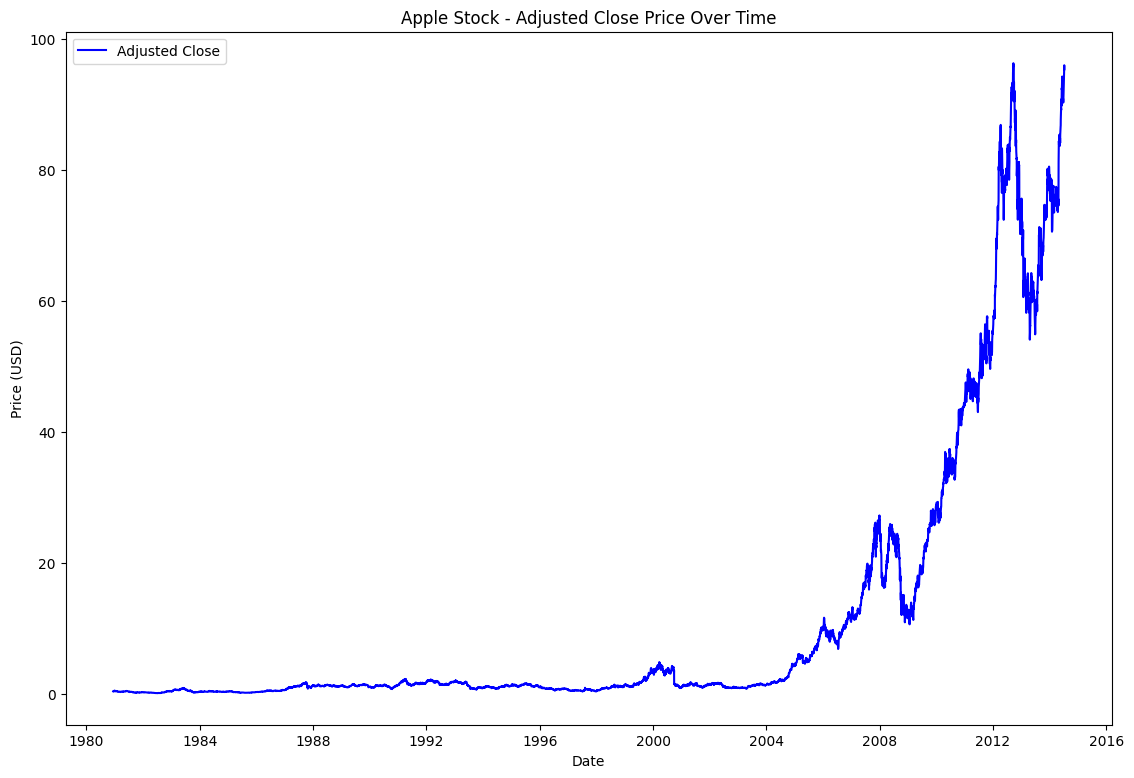

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13.5, 9))  # Đặt kích thước biểu đồ 13.5 x 9 inches
plt.plot(apple.index, apple['Adj Close'], label='Adjusted Close', color='blue')
plt.title('Apple Stock - Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


### BONUS: Create your own question and answer it.

Trung bình 'Adj Close' theo tháng:
Month
1     10.636184
2     10.813834
3     11.077433
4     11.609075
5     12.087298
6     12.002682
7     10.623940
8     10.716151
9     10.856622
10    10.817390
11    11.009111
12    10.832672
Name: Adj Close, dtype: float64

Tháng có giá 'Adj Close' trung bình cao nhất: 5
Giá trị trung bình cao nhất: 12.09 USD


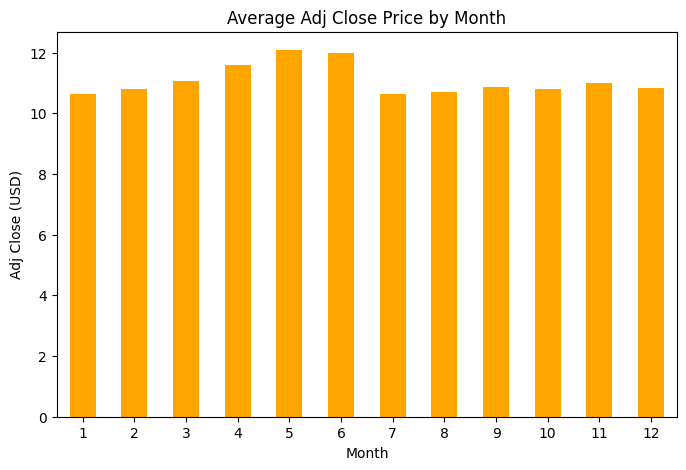

In [14]:
# 1. Tạo cột Month (nếu chưa có)
apple['Month'] = apple.index.month

# 2. Gom nhóm theo Month, tính trung bình cột 'Adj Close'
monthly_avg_adj_close = apple.groupby('Month')['Adj Close'].mean()

# 3. Tìm tháng có giá trung bình cao nhất
max_month = monthly_avg_adj_close.idxmax()
max_value = monthly_avg_adj_close.max()

print("Trung bình 'Adj Close' theo tháng:")
print(monthly_avg_adj_close)
print(f"\nTháng có giá 'Adj Close' trung bình cao nhất: {max_month}")
print(f"Giá trị trung bình cao nhất: {max_value:.2f} USD")

# 4. Vẽ biểu đồ
plt.figure(figsize=(8, 5))
monthly_avg_adj_close.plot(kind='bar', color='orange')
plt.title('Average Adj Close Price by Month')
plt.xlabel('Month')
plt.ylabel('Adj Close (USD)')
plt.xticks(rotation=0)
plt.show()
